# THE IMPACT OF GEOGRAPHY AND USE OF FERTILIZER TO CROP YIELD IN INDIA

In [1]:
# Creating dependencies for setup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
import warnings
from pathlib import Path
import hvplot.pandas
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

In [2]:
#Set file path
crop_csv=Path("resources/crop_yield.csv")
crop_csv

#Gather data from csv file
crop_df=pd.read_csv(crop_csv)

#CLean data
crop_cleaned_df=crop_df[["Crop","Crop_Year","State","Area","Fertilizer","Pesticide","Yield"]]

#### GEOGRAPHY ANALYSIS

In [3]:
# Function for ploting scatter plot
def plotting_scatter_plot(x,y,
                          x_label,y_label,title,
                         edgecolors='black',c="b"):
    # Build scatter plot
    plt.scatter(x,y,edgecolors=edgecolors,c=c)
    # Incorporate the other graph properties
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

# Define a function for ploting Linear Regression Plot
def linear_reg_plot(x_values,y_values,annotation_percentage_x=0.4,annotation_percentage_y=0.1,
                    line_color="r-",annotation_color="red",annotation_fontsize=15,annotation_show=True):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
        
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,line_color)
    
    # Calculate best-fit coordinates
    
    # Adjust the position of anotation x-coordinate
    best_fit_x = max(x_values) - annotation_percentage_x * (max(x_values) - min(x_values))
    # Adjust the position of anotation y-coordinate
    best_fit_y = max(y_values) - annotation_percentage_y * (max(y_values) - min(y_values))  
    if annotation_show==True:
        plt.annotate(line_eq,(best_fit_x,best_fit_y),fontsize=annotation_fontsize,color=annotation_color)
        print(f"The r-value is: {rvalue} \nThe p-value is: {pvalue}")

#The above functions was copied from Duc Trieu's previous assigment (Py weather)

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
states_name=crop_cleaned_df["State"].unique()
error_found=[]
state_data = []

# Print to logger
print("Starting to locate...")
print("-----------------------------")

appid=weather_api_key
#Loop through all state to retrieve data
for state in states_name:
    print("Getting the longitude and latitude of %s." % (state))
    params={"q": state + ",IN",
           "appid":appid}
    try:
        response=requests.get(url,params=params).json()
        state_lat=response["coord"]["lat"]
        state_lon=response["coord"]["lon"]
        print("The coordinates of %s: Latitude: %s | Longitude: %s." % (state,state_lat,state_lon))
        state_data.append({"State":state,
                          "Lat":state_lat,
                          "Lon":state_lon})
        print("*****")
    except Exception as e:
        print("Uh oh, something went wrong. Error code: %s" % (e))
        error_found.append(state)
        print("*****")
print("------------------------------")
print("Finish recording coordinates. Data has been updated! \n %s error(s) found: (%s)." % (len(error_found),error_found))
print("------------------------------")

Starting to locate...
-----------------------------
Getting the longitude and latitude of Assam.
The coordinates of Assam: Latitude: 26 | Longitude: 93.
*****
Getting the longitude and latitude of Karnataka.
The coordinates of Karnataka: Latitude: 13.5 | Longitude: 76.
*****
Getting the longitude and latitude of Kerala.
The coordinates of Kerala: Latitude: 10 | Longitude: 76.5.
*****
Getting the longitude and latitude of Meghalaya.
The coordinates of Meghalaya: Latitude: 25.5 | Longitude: 91.3333.
*****
Getting the longitude and latitude of West Bengal.
The coordinates of West Bengal: Latitude: 24 | Longitude: 88.
*****
Getting the longitude and latitude of Puducherry.
The coordinates of Puducherry: Latitude: 11.9333 | Longitude: 79.8167.
*****
Getting the longitude and latitude of Goa.
The coordinates of Goa: Latitude: 15.3333 | Longitude: 74.0833.
*****
Getting the longitude and latitude of Andhra Pradesh.
The coordinates of Andhra Pradesh: Latitude: 16 | Longitude: 79.
*****
Getting

In [5]:
#As the coordinator for Telangana' was not found, so it will be added manually
state_data.append({"State":"Telangana",
                          "Lat":18.1124,
                          "Lon":79.0193})

In [6]:
#Convert state coordinator into df
state_coor_df=pd.DataFrame(state_data)
#Get average yield for each state by Year
average_yield_states=crop_cleaned_df.groupby(["State"])["Yield"].mean().reset_index()

#merge state_coor and yield by state
yield_states=pd.merge(crop_cleaned_df[["State","Yield"]],state_coor_df,on="State",how="inner")

#merge state_coor and average yield by state
merged_average_yield_state=pd.merge(average_yield_states,state_coor_df,on="State",how="inner")

The r-value is: -0.07984619433116448 
The p-value is: 3.215222215838964e-29


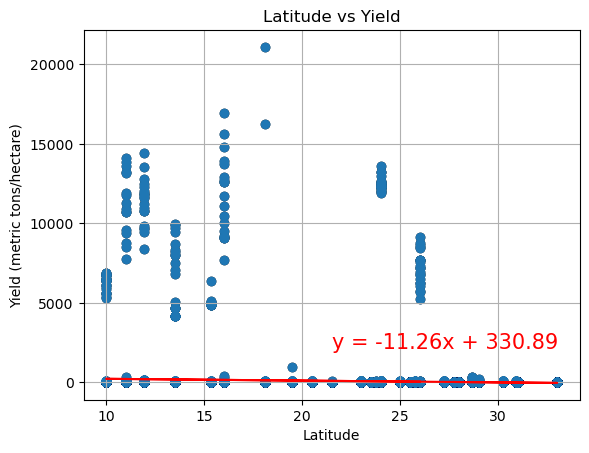

In [7]:
#Plotting scatter plot to show the relationship of Latitude and Yield
plotting_scatter_plot(yield_states["Lat"],yield_states["Yield"],"Latitude","Yield (metric tons/hectare)","Latitude vs Yield")
#Plot linear correlation line
linear_reg_plot(yield_states["Lat"],yield_states["Yield"],annotation_percentage_x=0.5,annotation_percentage_y=0.9)
plt.savefig("output/yield_by_state/Latitude vs Yield.png")

**Comments:**
- There is a weak relationship between the latitude and the yield.
- The relationship is statistically significant.
- There are some omissions such as: type of crop, year

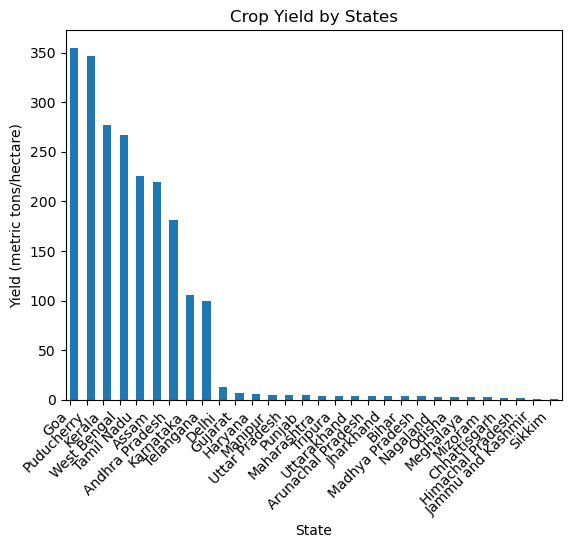

In [8]:
#Plotting bar chart to see the different between states

plot_bar_average_yield_states=average_yield_states.sort_values(by="Yield",ascending=False).plot(kind="bar",
                                                                                                x="State",
                                                                                                align='edge', 
                                                                                                width=0.5,legend=False)
plt.title("Crop Yield by States")
plt.ylabel("Yield (metric tons/hectare)")
plt.xticks(rotation=45, ha='right')
plt.savefig("output/yield_by_state/Crop Yield by States.png")
plt.show()

**Comments:**
- 9 states show high yield when compared to the majority of the states listed in the graph, which have relatively very low yield.
- Some investigations are needed for the states of Goa, Puducherry, Kerala, West Bengal, Tamil Nadu, Assam, Andhra Pradesh, Karnataka and Telangana to find out the reasons why these states display high crop yield. This could be due to the properties of the crops, the quality of soil, etc.

In [9]:
#Showing Average Yield by state on map
map_yield_stats=merged_average_yield_state.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Yield",
    scale = 1,
    color = "State",
    alpha=0.8)
map_yield_stats.opts(xlabel="Longitude",ylabel="Latitude")
#Save map as png file
hvplot.save(map_yield_stats, 'output/yield_by_state/map_yield_states.png', fmt='png')
#show map
map_yield_stats


C:\Users\dalet\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\dalet\anaconda3\Lib\site-packages\geoviews\operation\__init__.py:14: HoloviewsDeprecationWarning: 'ResamplingOperation' is deprecated and will be removed in version 1.18, use 'ResampleOperation2D' instead.
  from holoviews.operation.datashader import (


RuntimeError: Neither firefox and geckodriver nor a variant of chromium browser and chromedriver are available on system PATH. You can install the former with 'conda install -c conda-forge firefox geckodriver'.

#### FERTILIZER ANALYSIS

In [10]:
#Calculate how much fertilizer used per hectares
crop_df["Fertilizer per hectares"]=crop_df["Fertilizer"]/crop_df["Area"]

The r-value is: 0.0018437987210733573 
The p-value is: 0.7958659356671683


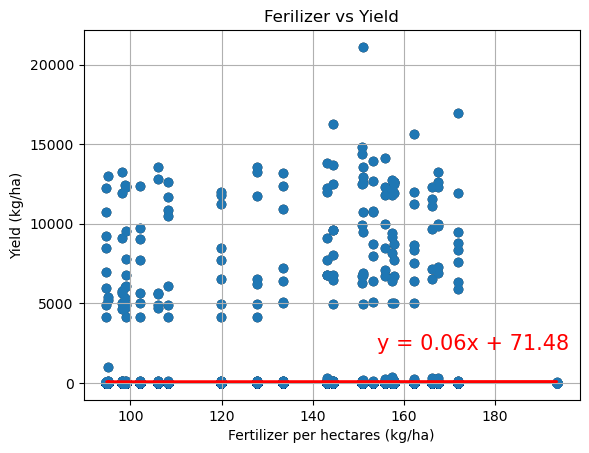

In [11]:
# Plotting the correlation between Fertilizer used and Yield
plotting_scatter_plot(crop_df["Fertilizer per hectares"],crop_df["Yield"],
                      x_label="Fertilizer per hectares (kg/ha)",y_label="Yield (kg/ha)",
                     title="Ferilizer vs Yield")
linear_reg_plot(crop_df["Fertilizer per hectares"],crop_df["Yield"],annotation_percentage_y=0.9)
plt.savefig("output/yield_by_state/Ferilizer vs Yield.png")

**Comments:**
- There is no statistically significant relationship between the use of fertiliser and yield.

In [12]:
#Yield by year df
yield_years=crop_df.groupby("Crop_Year")["Yield"].mean()
#Fertilizer used per hectare by year df
fertilizer_years=crop_df.groupby("Crop_Year")["Fertilizer per hectares"].mean()
#Merge Fertilizer and Yield
merged_yield_ferilizer_years=pd.merge(fertilizer_years,yield_years,on="Crop_Year",how="inner")

The r-value is: 0.9241759680119975 
The p-value is: 1.1523017946289214e-10


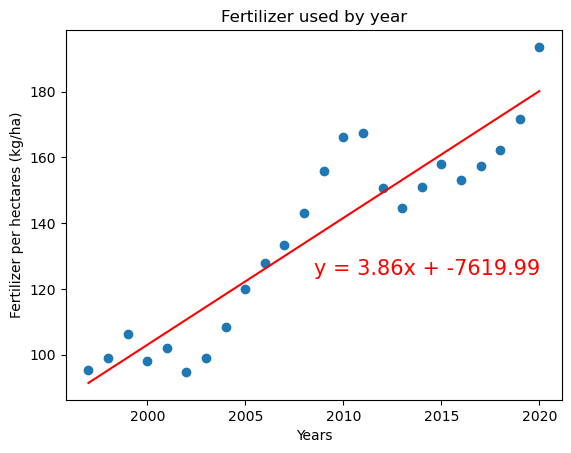

In [13]:
# Plotting line to show the relationship of Fertilizer by Year

linear_reg_plot(merged_yield_ferilizer_years.index.values,
                merged_yield_ferilizer_years["Fertilizer per hectares"],annotation_percentage_x=0.5,annotation_percentage_y=0.7)
plt.xlabel("Years")
plt.ylabel("Fertilizer per hectares (kg/ha)")
plt.title("Fertilizer used by year")

plt.savefig("output/yield_by_state/Fertilizer used by year.png")

**Comments:**
- A strong correlation was found between Fertilizer used and Year.
- This show a significant increase in fertilizer used in Indian.

The r-value is: -0.10812560842099424 
The p-value is: 0.6150302498836117


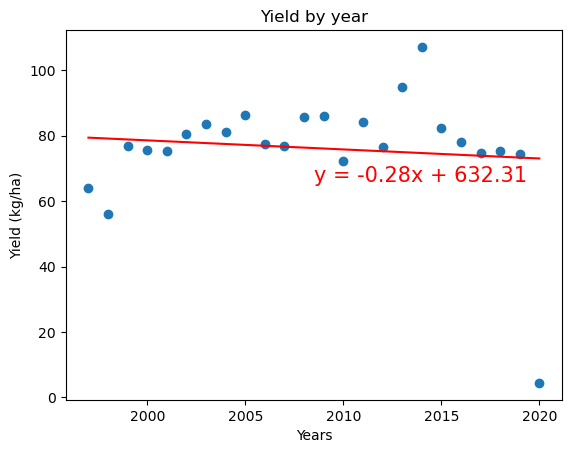

In [14]:
# Plotting line to show the relationship of Yield by Year
linear_reg_plot(merged_yield_ferilizer_years.index.values,
                merged_yield_ferilizer_years["Yield"],annotation_percentage_x=0.5,annotation_percentage_y=0.4)
plt.xlabel("Years")
plt.ylabel("Yield (kg/ha)")
plt.title("Yield by year")

plt.savefig("output/yield_by_state/Yield by year.png")

**Comments:**
- There is no statistically significant relationship between time and yield.